# Phase 7: ML prediction

**Executive Summary:**
The final phase involves the development and optimization of predictive models. By training multiple classification algorithms—ranging from Logistic Regression to Support Vector Machines—we identify the most accurate model for predicting first-stage landings. This phase represents the culmination of the project, turning raw data into an actionable predictive tool.

**Objectives:**
- Standardize the feature matrix to ensure distance-based algorithms are not biased by variable scales.
- Split the dataset into training and testing sets to validate model generalizability.
- Execute hyperparameter tuning via GridSearchCV to optimize the performance of four core classifiers.
- Evaluate model performance using Accuracy, Jaccard Index, and F1-Scores to select the best deployment candidate.

**Acknowledgments:**
- Original lab structure from IBM Data Science Professional Certificate

## 1) Importing Libraries and Defining Auxiliary Functions

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - Preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV

# Machine Learning - Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Display versions for reproducibility
import sklearn
print(f"scikit-learn version: {sklearn.__version__}")
print(f"pandas version: {pd.__version__}")

scikit-learn version: 1.7.2
pandas version: 2.3.3


In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='d', cmap='Blues')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'land'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()
    

## 2) Data Loading

In [3]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# Display basic information
print(f"Dataset shape: {data.shape}")
print(f"\nData types:\n{data.dtypes}")
print(f"\nMissing values:\n{data.isnull().sum()}")

# Display first few rows
data.head()

Dataset shape: (90, 18)

Data types:
FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
Class               int64
dtype: object

Missing values:
FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
Class              0
dtype: int64


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [4]:
# Load feature data
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

# Basic statistics
print(f"Features shape: {X.shape}")
X.describe()

Features shape: (90, 83)


,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,...,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,6104.959412,1.788889,3.500000,1.655556,0.011111,0.011111,0.300000,0.011111,0.233333,...,0.033333,0.044444,0.033333,0.011111,0.222222,0.777778,0.588889,0.411111,0.211111,0.788889
std,26.124701,4694.671720,1.213172,1.595288,1.710254,0.105409,0.105409,0.460825,0.105409,0.425322,...,0.180511,0.207235,0.180511,0.105409,0.418069,0.418069,0.494792,0.494792,0.410383,0.410383
min,1.000000,350.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.250000,2510.750000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,45.500000,4701.500000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,67.750000,8912.750000,2.000000,5.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,15600.000000,6.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 3) Target variable creation

In [5]:
# Create target variable Y from Class column
Y = data['Class'].to_numpy()

# Verify the target variable
print(f"Target variable shape: {Y.shape}")
print(f"Class distribution:\n{pd.Series(Y).value_counts()}")
print(f"Class balance: {pd.Series(Y).value_counts(normalize=True)}")

Target variable shape: (90,)
Class distribution:
1    60
0    30
Name: count, dtype: int64
Class balance: 1    0.666667
0    0.333333
Name: proportion, dtype: float64


## 4) Standardization

In [6]:
# Initialize StandardScaler
transform = preprocessing.StandardScaler()

# Fit and transform the features
X = transform.fit_transform(X)

# Verify standardization
print(f"Feature means after scaling: {X.mean(axis=0)[:5]}")  # Should be ~0
print(f"Feature stds after scaling: {X.std(axis=0)[:5]}")    # Should be ~1

Feature means after scaling: [ 1.48029737e-17 -1.41861831e-16 -7.27812872e-17 -1.97372982e-17
  5.92118946e-17]
Feature stds after scaling: [1. 1. 1. 1. 1.]


## 5) Train-Test split

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, 
    test_size=0.2, 
    random_state=2,
    stratify=Y  # Ensure balanced split
)

# Display split information
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Training set class distribution:\n{pd.Series(Y_train).value_counts()}")
print(f"Test set class distribution:\n{pd.Series(Y_test).value_counts()}")

Training set size: 72
Test set size: 18
Training set class distribution:
1    48
0    24
Name: count, dtype: int64
Test set class distribution:
1    12
0     6
Name: count, dtype: int64


In [8]:
Y_test.shape

(18,)

## 6) Logistic Regression

In [9]:
# Define parameter grid
parameters = {
    'C': [0.01, 0.1, 1],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

# Create model
lr = LogisticRegression(max_iter=1000)

# Create GridSearchCV object
logreg_cv = GridSearchCV(lr, parameters, cv=10, scoring='accuracy')

# Fit the model
logreg_cv.fit(X_train, Y_train)

# Display results
print("Tuned hyperparameters (best parameters):", logreg_cv.best_params_)
print("Accuracy:", logreg_cv.best_score_)

Tuned hyperparameters (best parameters): {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.85


In [10]:
# Calculate test accuracy
test_accuracy = logreg_cv.score(X_test, Y_test)
print(f"Logistic Regression Test Accuracy: {test_accuracy:.4f}")

Logistic Regression Test Accuracy: 0.8333


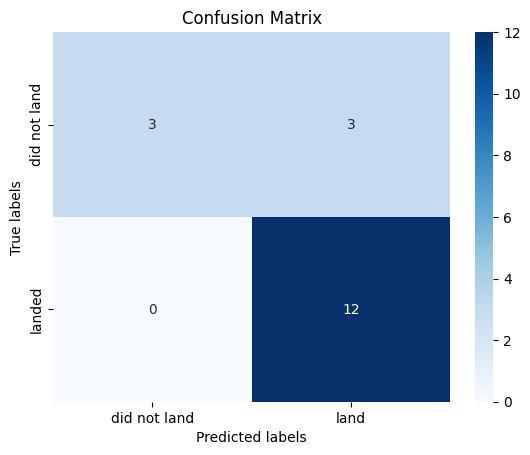

In [11]:
#Confusion matrix for logistic regression
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## 7) SVM

In [12]:
# Define parameter grid
parameters = {
    'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}

# Create SVM model
svm = SVC()

# Create GridSearchCV object
svm_cv = GridSearchCV(svm, parameters, cv=10, scoring='accuracy')

# Fit the model
svm_cv.fit(X_train, Y_train)

# Display results
print("Tuned hyperparameters (best parameters):", svm_cv.best_params_)
print("Accuracy:", svm_cv.best_score_)

Tuned hyperparameters (best parameters): {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
Accuracy: 0.8642857142857144


In [13]:
# Calculate test accuracy
svm_test_accuracy = svm_cv.score(X_test, Y_test)
print(f"SVM Test Accuracy: {svm_test_accuracy:.4f}")

SVM Test Accuracy: 0.8333


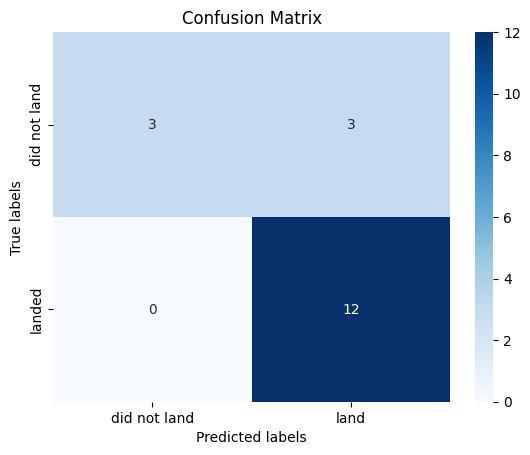

In [14]:
# Confusion matrix for SVM
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## 8) Decision Tree

In [15]:
# Define parameter grid
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1, 10)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Create Decision Tree model
tree = DecisionTreeClassifier()

# Create GridSearchCV object
tree_cv = GridSearchCV(tree, parameters, cv=10, scoring='accuracy')

# Fit the model
tree_cv.fit(X_train, Y_train)

# Display results
print("Tuned hyperparameters (best parameters):", tree_cv.best_params_)
print("Accuracy:", tree_cv.best_score_)

Tuned hyperparameters (best parameters): {'criterion': 'entropy', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
Accuracy: 0.9053571428571429


C:\Users\Zaara\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Zaara\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Zaara\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
  File "C:\Users\Zaara\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 471, in _validate_params
    v

In [16]:
# Calculate test accuracy
tree_test_accuracy = tree_cv.score(X_test, Y_test)
print(f"Decision Tree Test Accuracy: {tree_test_accuracy:.4f}")

Decision Tree Test Accuracy: 0.8333


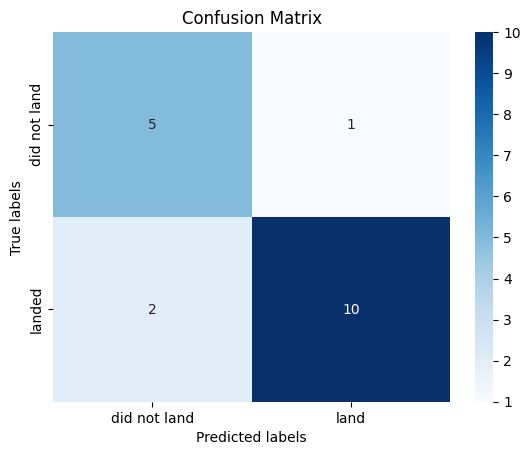

In [17]:
# Confusion matrix for Decision Tree
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## 9) KNN

In [18]:
# Define parameter grid
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Create KNN model
KNN = KNeighborsClassifier()

# Create GridSearchCV object
knn_cv = GridSearchCV(KNN, parameters, cv=10, scoring='accuracy')

# Fit the model
knn_cv.fit(X_train, Y_train)

# Display results
print("Tuned hyperparameters (best parameters):", knn_cv.best_params_)
print("Accuracy:", knn_cv.best_score_)

Tuned hyperparameters (best parameters): {'algorithm': 'auto', 'n_neighbors': 4, 'p': 1}
Accuracy: 0.8642857142857142


In [19]:
# Calculate test accuracy
knn_test_accuracy = knn_cv.score(X_test, Y_test)
print(f"KNN Test Accuracy: {knn_test_accuracy:.4f}")

KNN Test Accuracy: 0.7778


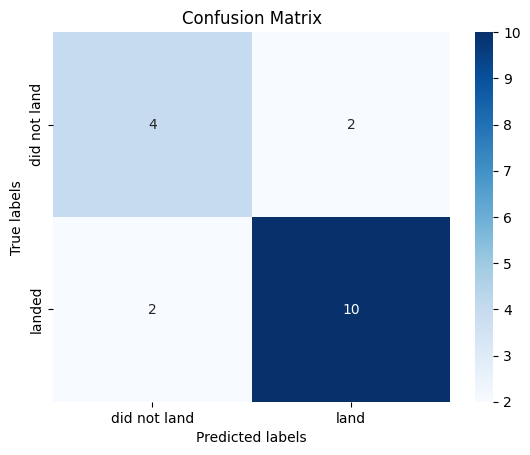

In [20]:
# Confusion matrix for KNN
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## 10) comparison dataframe

Model Performance Comparison:
              Model  Train Accuracy (CV)  Test Accuracy
Logistic Regression             0.850000       0.833333
                SVM             0.864286       0.833333
      Decision Tree             0.905357       0.833333
                KNN             0.864286       0.777778

Best performing model: Logistic Regression


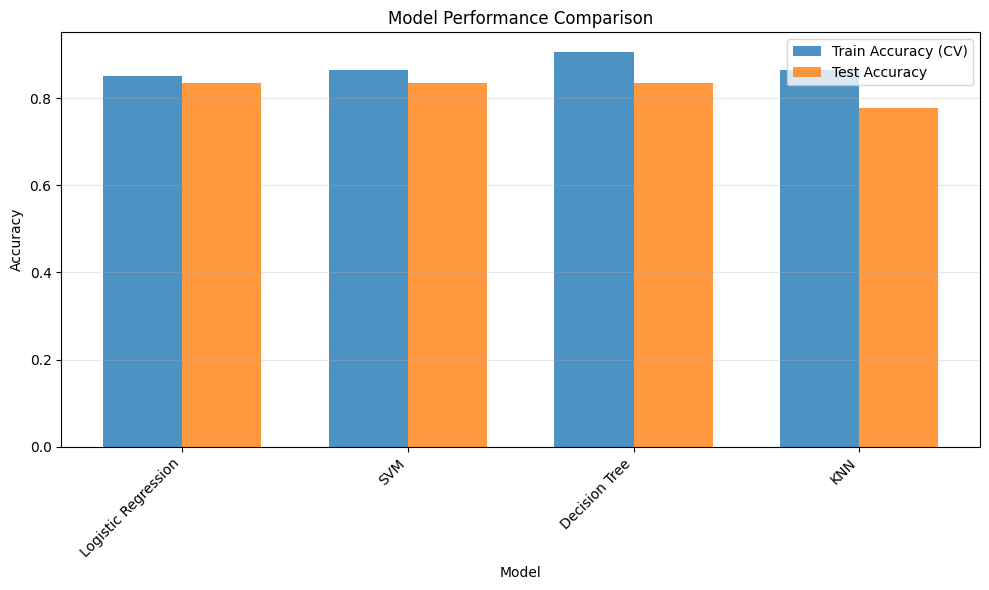

In [21]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN'],
    'Train Accuracy (CV)': [
        logreg_cv.best_score_,
        svm_cv.best_score_,
        tree_cv.best_score_,
        knn_cv.best_score_
    ],
    'Test Accuracy': [
        test_accuracy,
        svm_test_accuracy,
        tree_test_accuracy,
        knn_test_accuracy
    ]
})

# Display results
print("Model Performance Comparison:")
print(results.to_string(index=False))
print(f"\nBest performing model: {results.loc[results['Test Accuracy'].idxmax(), 'Model']}")

# Visualize comparison
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(results))
width = 0.35

ax.bar(x - width/2, results['Train Accuracy (CV)'], width, label='Train Accuracy (CV)', alpha=0.8)
ax.bar(x + width/2, results['Test Accuracy'], width, label='Test Accuracy', alpha=0.8)

ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(results['Model'], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()